In [316]:
# Import some libraries

import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 

# Import some data
digits = load_digits()
# Show dimensionality
print(digits.data.shape)


(1797, 64)


<Figure size 432x288 with 0 Axes>

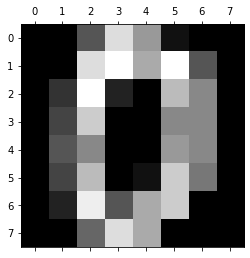

In [317]:
# Show one data

plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

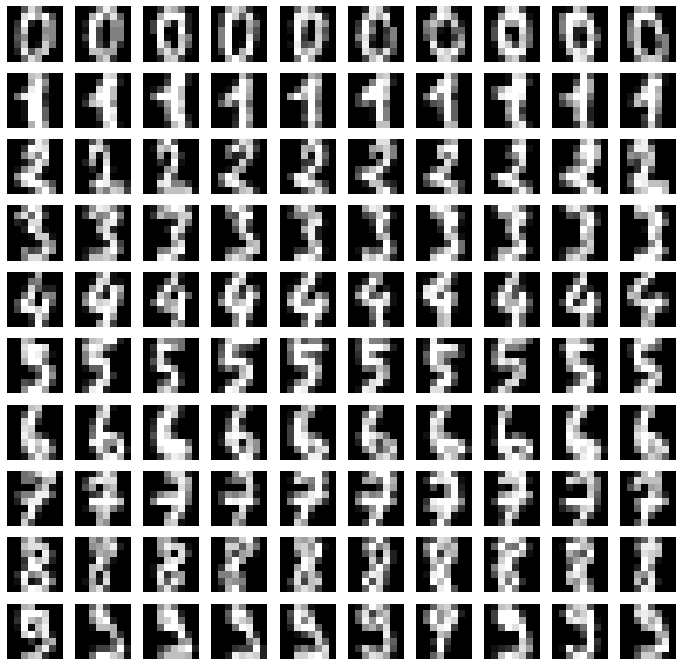

In [339]:
# Show several data for each label (== category) 

X = digits.images
Y = digits.target

n_digits = np.unique(Y)
M = 10
dim = int(np.sqrt(X.shape[1]))

fig, axs = plt.subplots(len(n_digits), M, figsize=(12, 12))
for i, d in enumerate(n_digits):
    for j in range(M):
        a = X[Y == d][j]
        axs[i,j].imshow(a)
        axs[i,j].axis('off')


In [433]:
# Build train and test datasets for single class classification

from sklearn.model_selection import train_test_split

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size)

rtrain = X_train.shape[0]/ X.shape[0]
rtest = X_test.shape[0] / X.shape[0]
print("train size ratio: %.3f : %d" % (rtrain, len(X_train)))
print("test size ratio: %.3f : %d" % (rtest, len(X_test)))

# Reformat the data to be "compliant" with sklearn input
X_train = X_train.reshape(len(X_train), 64)
X_test = X_test.reshape(len(X_test), 64)

# Prediction for the hand-written digit 7
y_train[y_train != 7] = 0
y_test[y_test != 7] = 0
y_train[y_train == 7] = 1
y_test[y_test == 7] = 1

train size ratio: 0.800 : 1437
test size ratio: 0.200 : 360


In [434]:
# Fit the models

from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


models = {"LogisticRegression": LogisticRegression(solver="saga"),
          "LinearSVC": LinearSVC(),
          "SVC": SVC(),
          "KNN": KNeighborsClassifier(),
          "RandomForestClassifier": RandomForestClassifier(),
         }
results = dict((k, {}) for k in models)

for name, model in models.items():
    print("fitting %s" % name)
    start = time()
    model.fit(X_train, y_train)
    results[name]['time'] = time() - start 


fitting LogisticRegression
fitting LinearSVC


/home/dtrckd/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/dtrckd/.local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


fitting SVC
fitting KNN
fitting RandomForestClassifier


In [435]:
# Compute the score (precision and recall)

from sklearn.metrics import precision_score, recall_score, accuracy_score

for name, model in models.items():
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    # precision
    pr_train = precision_score(y_train, y_pred_train)
    pr_test = precision_score(y_test, y_pred_test)
    # Recall
    recall_train = recall_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)
    # Score (accuraacy)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    results[name]['train'] = pr_train, recall_train, acc_train
    results[name]['test'] = pr_test, recall_test, acc_test

In [436]:
# plot the binary classifier score (precision and recall on **train** test

import pandas as pd

setname = "train"
res2 = dict((k,{"precision" : v[setname][0],
                "recall" : v[setname][1],
                "accuracy": v[setname][2],
                "time" : v["time"]
               }) for k,v in results.items())

tab = pd.DataFrame.from_dict(res2, orient='index')

print("performance on %s set: " % setname)
tab

performance on train set: 


,precision,recall,accuracy,time
LogisticRegression,1.000000,0.986577,0.998608,0.193059
LinearSVC,1.000000,1.000000,1.000000,0.013346
SVC,1.000000,0.993289,0.999304,0.020572
KNN,0.993289,0.993289,0.998608,0.010628
RandomForestClassifier,1.000000,1.000000,1.000000,0.295157


In [437]:
# plot the binary classifier score (precision and recall on **train** test

import pandas as pd

setname = "test"
res2 = dict((k,{"precision" : v[setname][0],
                "recall" : v[setname][1],
                "accuracy": v[setname][2],
                "time" : v["time"]
               }) for k,v in results.items())

tab = pd.DataFrame.from_dict(res2, orient='index')

print("performance on %s set: " % setname)
Al tab

performance on test set: 


,precision,recall,accuracy,time
LogisticRegression,0.937500,1.000000,0.994444,0.193059
LinearSVC,0.937500,1.000000,0.994444,0.013346
SVC,1.000000,1.000000,1.000000,0.020572
KNN,0.967742,1.000000,0.997222,0.010628
RandomForestClassifier,1.000000,0.966667,0.997222,0.295157


All the algorithm seems to perform well !


The best algorithms in term of accuracy are in order 
1. SVM
2. KNN, RandomForest
3. LinearSvcn Logistic regression
4. Logistic regression


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       330
           1       0.94      1.00      0.97        30

    accuracy                           0.99       360
   macro avg       0.97      1.00      0.98       360
weighted avg       0.99      0.99      0.99       360



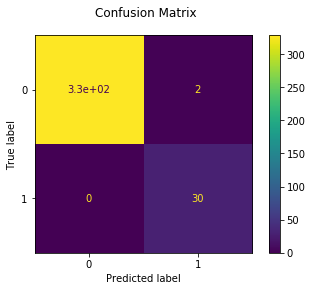

In [438]:
# plot the confusion matrix for the Logistic Regression classifier

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

classifier = models["LogisticRegression"]

cmat = plot_confusion_matrix(classifier, X_test, y_test)
cmat.figure_.suptitle("Confusion Matrix")
#print("Confusion matrix:\n%s" % cmat.confusion_matrix)

report = classification_report(y_test, classifier.predict(X_test))
print(report)

We observe that there is very data used to classifiy the "1". The dataset is imbalanced ! 

How can we provide more faire comparaison or measure in the case of an imbalancer dataset ?

In [324]:
# Build train and test datasets for **multi-class** classification
# Fit models
# Show the results

from sklearn.model_selection import train_test_split
from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score, recall_score


test_size = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size)

# Reformat the data to be "compliant" with sklearn input
X_train = X_train.reshape(len(X_train), 64)
X_test = X_test.reshape(len(X_test), 64)


models = {"LogisticRegression": LogisticRegression(),
          "LinearSVC": LinearSVC(),
          "KNN": KNeighborsClassifier(),
          "SVC": SVC(),
          "RandomForestClassifier": RandomForestClassifier(),
         }
results = dict((k, {}) for k in models)

for name, model in models.items():
    print("fitting %s" % name)
    start = time()
    model.fit(X_train, y_train)
    results[name]['time'] = time() - start 
    

fitting LogisticRegression
fitting LinearSVC
fitting KNN
fitting SVC
fitting RandomForestClassifier


/home/dtrckd/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/dtrckd/.local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       142
           1       0.91      0.88      0.90       153
           2       0.96      0.99      0.98       139
           3       0.94      0.96      0.95       142
           4       0.98      0.91      0.94       150
           5       0.95      0.97      0.96       144
           6       0.98      0.98      0.98       146
           7       0.99      0.97      0.98       147
           8       0.92      0.92      0.92       131
           9       0.88      0.93      0.91       144

    accuracy                           0.95      1438
   macro avg       0.95      0.95      0.95      1438
weighted avg       0.95      0.95      0.95      1438



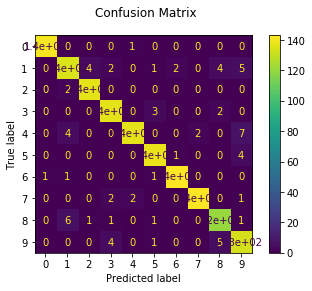

In [325]:
# plot the confusion matrix for the Logistic Regression classifier

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

classifier = models["LogisticRegression"]

cmat = plot_confusion_matrix(classifier, X_test, y_test)
cmat.figure_.suptitle("Confusion Matrix")
#print("Confusion matrix:\n%s" % cmat.confusion_matrix)

report = classification_report(y_test, classifier.predict(X_test))
print(report)

This time, we observed thjat the dataset is balanced: we have rouhly the same number of data in each category. 

The 1 seems to be the digits that is the hardest to recognize. (in term of f1 score)
The 9 seems to the hardest in terms of precision (maybe because is it at the same time similar to a 8 and 3.)